### Imports

In [1]:
import os
import numpy as np
import pickle
from helpers.SimulationAnalysis import SimulationAnalysis, readHlist
import matplotlib.pylab as plt
from cycler import cycler

#......new imports (helper class)
import sys
sys.path.insert(0, '/Users/logan_main/nsbp-2023/scripts') # adding to the system path
from hlistHelper import hlist

#......formatting
%matplotlib inline
%config InlineBackend.figure_format='retina'
%config InlineBackend.rc = {'figure.facecolor': 'w'}
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = 'cm'

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Upcoming

In [2]:
# TODO: scatterplot for z = 0.85 upper mass discrepancy investigation (see w2)
# TODO: work on visualization testing for helper class
# TODO: think about ways to model N(tot) as funct. of z

### redshift resolution :: limit testing

An early conservative estimate from the CDM plot below:
- consider cutting off all z higher than ~5
- range of 0 < z < 5 for x-axis

TODO: come back to these estimates for WDM and other DM models to see if the limit holds.

In [3]:
with open("../data/sim_data.bin", "rb") as f:
    sim_data = pickle.load(f, encoding='latin1')

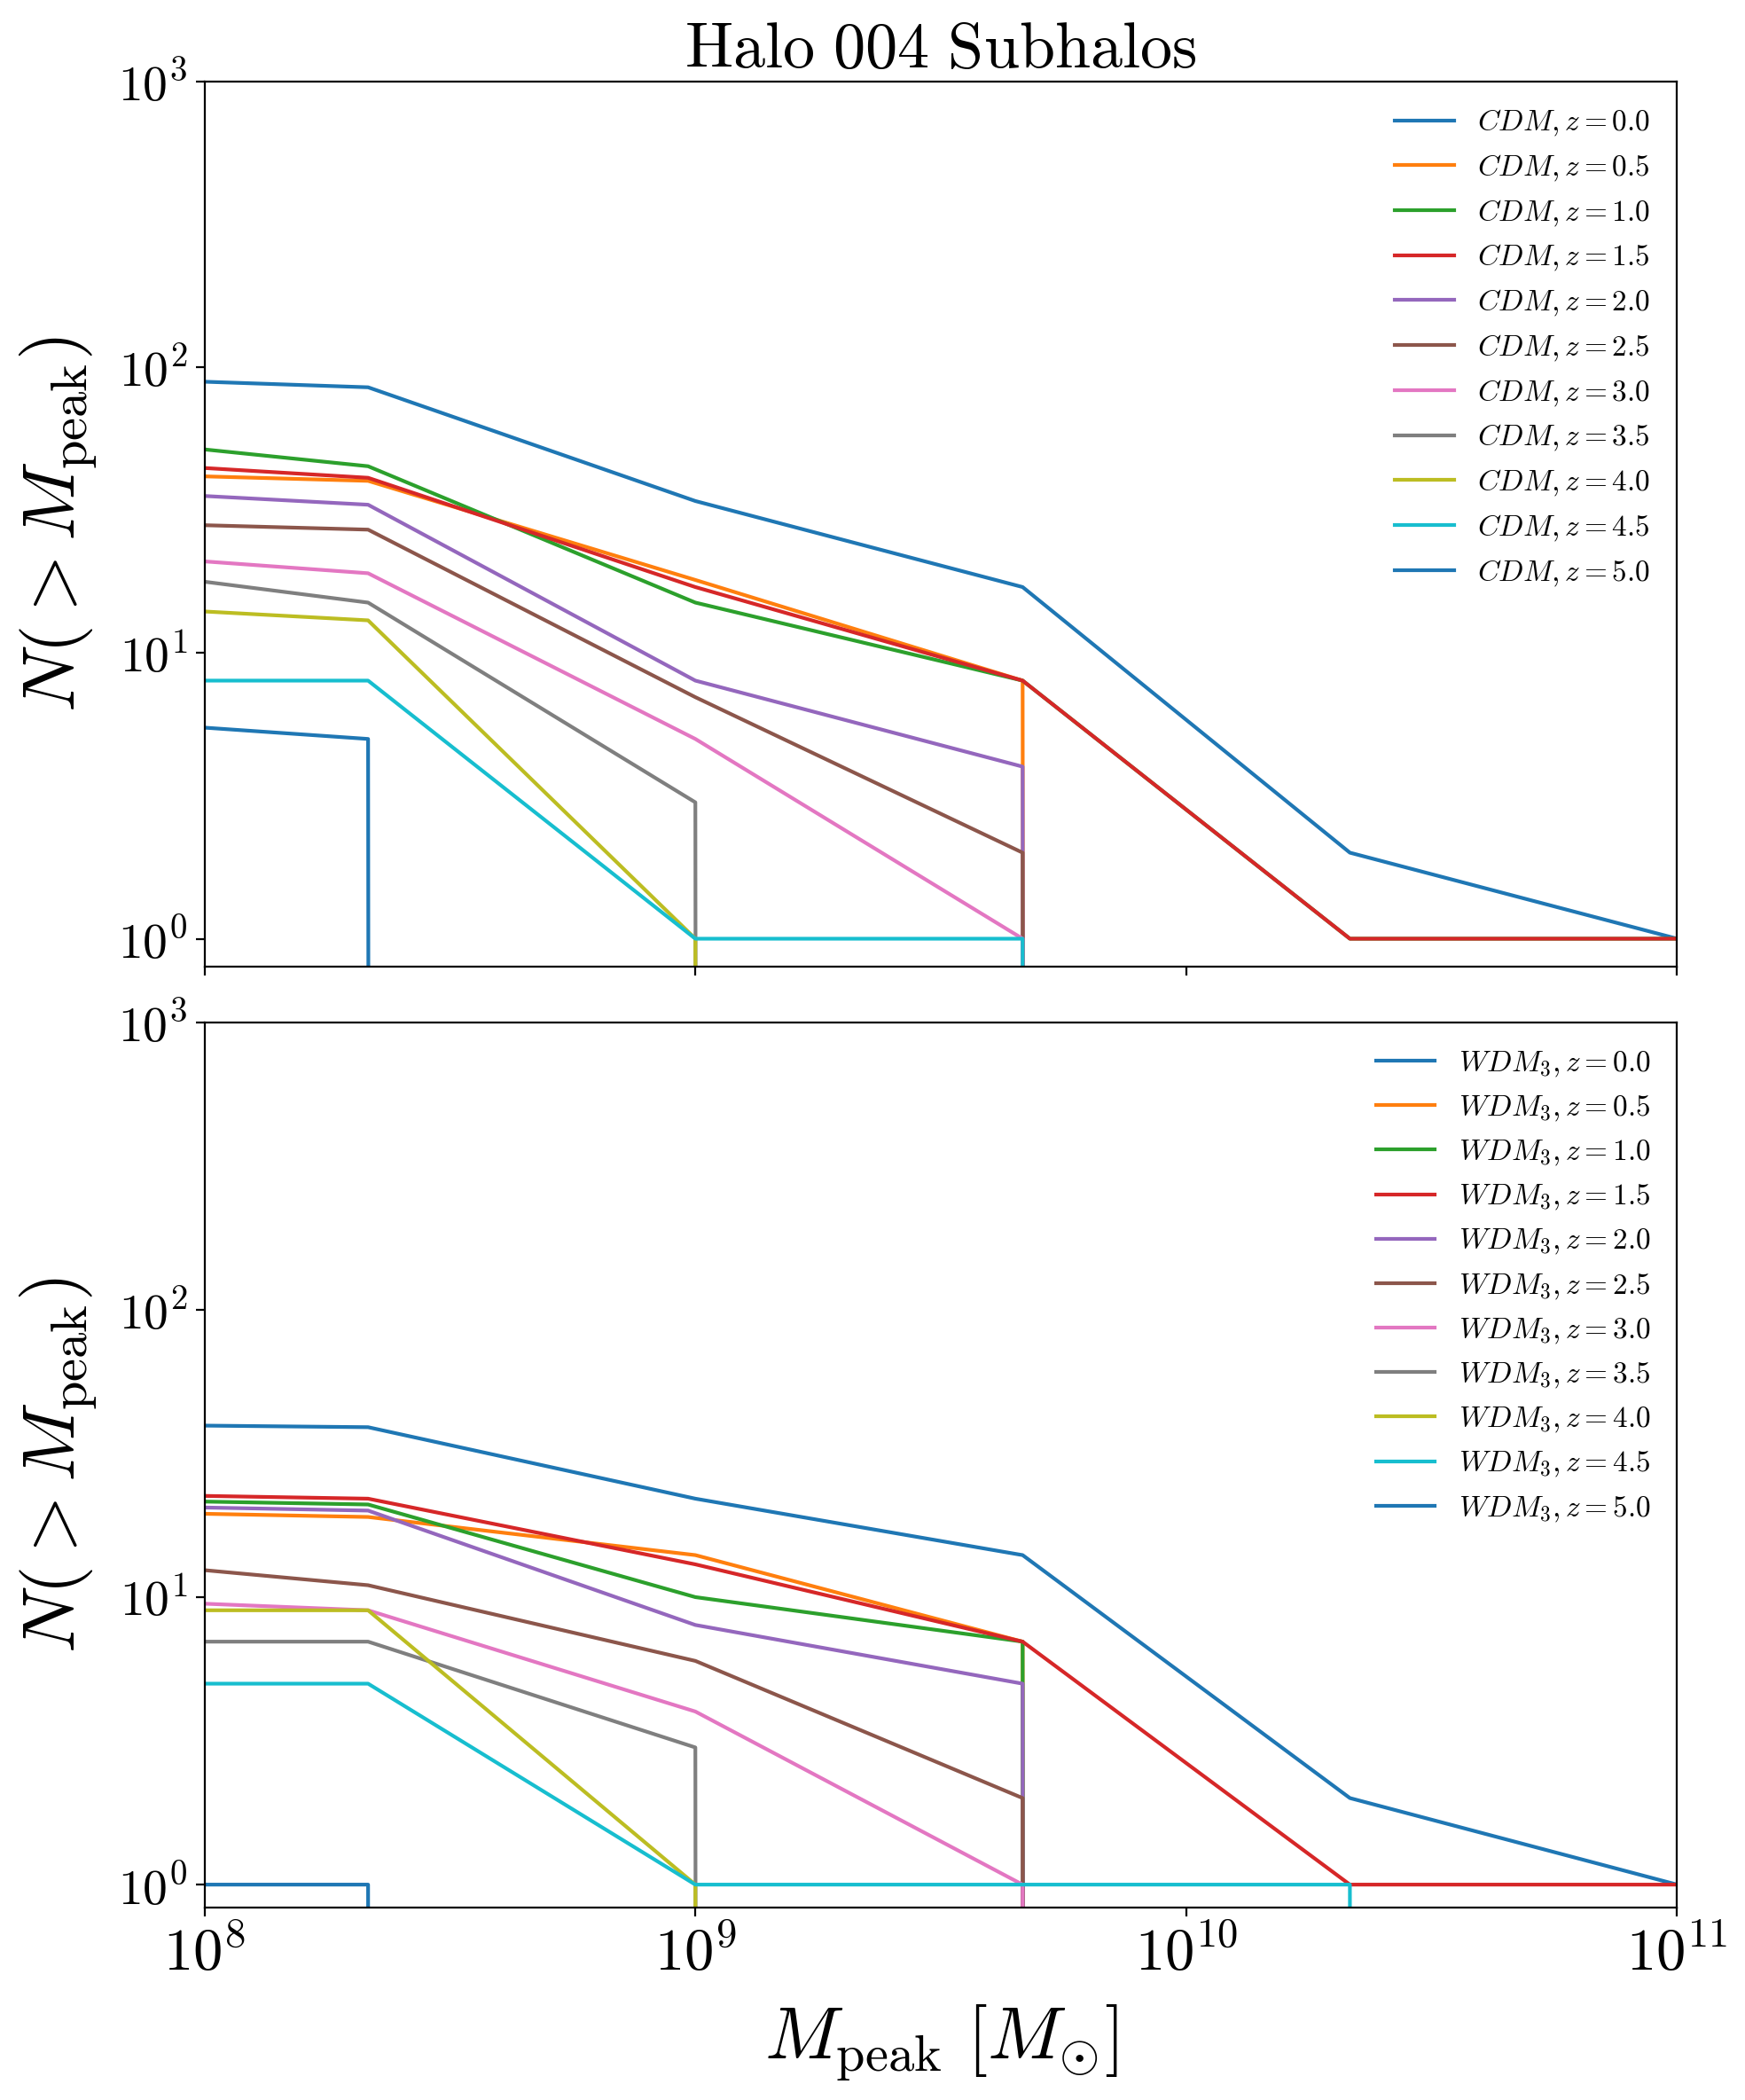

In [4]:
#...... cold dark matter
model = 'cdm'
halo_num = 'Halo004'

cdm = hlist(PATH='../data', halo_num='', model=model)
cdm.load_hlists()
cdm.hmb = sim_data[halo_num][model][0]

#...... warm dark matter, 3 keV
model = 'wdm_3'
wdm = hlist(PATH='../data', halo_num='', model=model)
wdm.load_hlists()
wdm.hmb = sim_data[halo_num][model][0]

redshifts = np.linspace(0, 5, 11) # redshifts up to z = 10, spaced evenly

#....... setting up the plot
f, ax = plt.subplots(2,1, sharex='col', sharey='row', figsize=(10,12))
bins = np.linspace(5,11,10)

#....... fancy color things
n = 10 # no. of colors
new_colors = [plt.get_cmap('magma')(1. * i/n) for i in range(n)]

plt.rc('axes', prop_cycle=(cycler('color', new_colors)))


#....... cycling through redshifts to plot
for z in redshifts:
    x, y = cdm.shmf_plottables(z)
    ax[0].plot(x, y,label=f'$CDM, z={z}$')

    x, y = wdm.shmf_plottables(z)
    ax[1].plot(x, y,label=f'$WDM_3, z={z}$')


#....... formatting, etc.

ax[0].set_title(r'$\mathrm{Halo\ 004\ Subhalos}$',fontsize=26)
ax[0].set_yscale('log')
ax[0].set_yticks([1,10,100,1000])
ax[0].set_yticklabels([r'$10^0$',r'$10^1$',r'$10^2$',r'$10^3$'], fontsize=20)
ax[0].legend(loc=1, ncol=1, prop={'size':12}, frameon=False)
ax[0].set_ylabel(r'$N(>M_{\rm{peak}})$',fontsize=30,labelpad=8)
ax[0].minorticks_off()
ax[0].set_xlim(8,11)

ax[1].set_xticks([8,9,10,11])
ax[1].set_xticklabels([r'$10^8$',r'$10^9$',r'$10^{10}$',r'$10^{11}$'], fontsize=24)
ax[1].set_yscale('log')
ax[1].set_yticks([1,10,100,1000])
ax[1].set_yticklabels([r'$10^0$',r'$10^1$',r'$10^2$',r'$10^3$'], fontsize=20)
ax[1].legend(loc=1, ncol=1, prop={'size':12}, frameon=False)
ax[1].set_xlabel(r'$M_{\rm{peak}}\ [M_{\mathrm{\odot}}]$',fontsize=30,labelpad=8)
ax[1].set_ylabel(r'$N(>M_{\rm{peak}})$',fontsize=30,labelpad=8)
ax[1].tick_params(axis='x', which='minor', bottom=False)
ax[1].minorticks_off()

###

plt.tight_layout()
plt.show()

### mass discrepancy, z = 1 (CDM)
scatterplot for z = 1 upper mass discrepancy investigation (see w2), might also do this for $WDM_3$ (same sort of issue around z = 0.85).

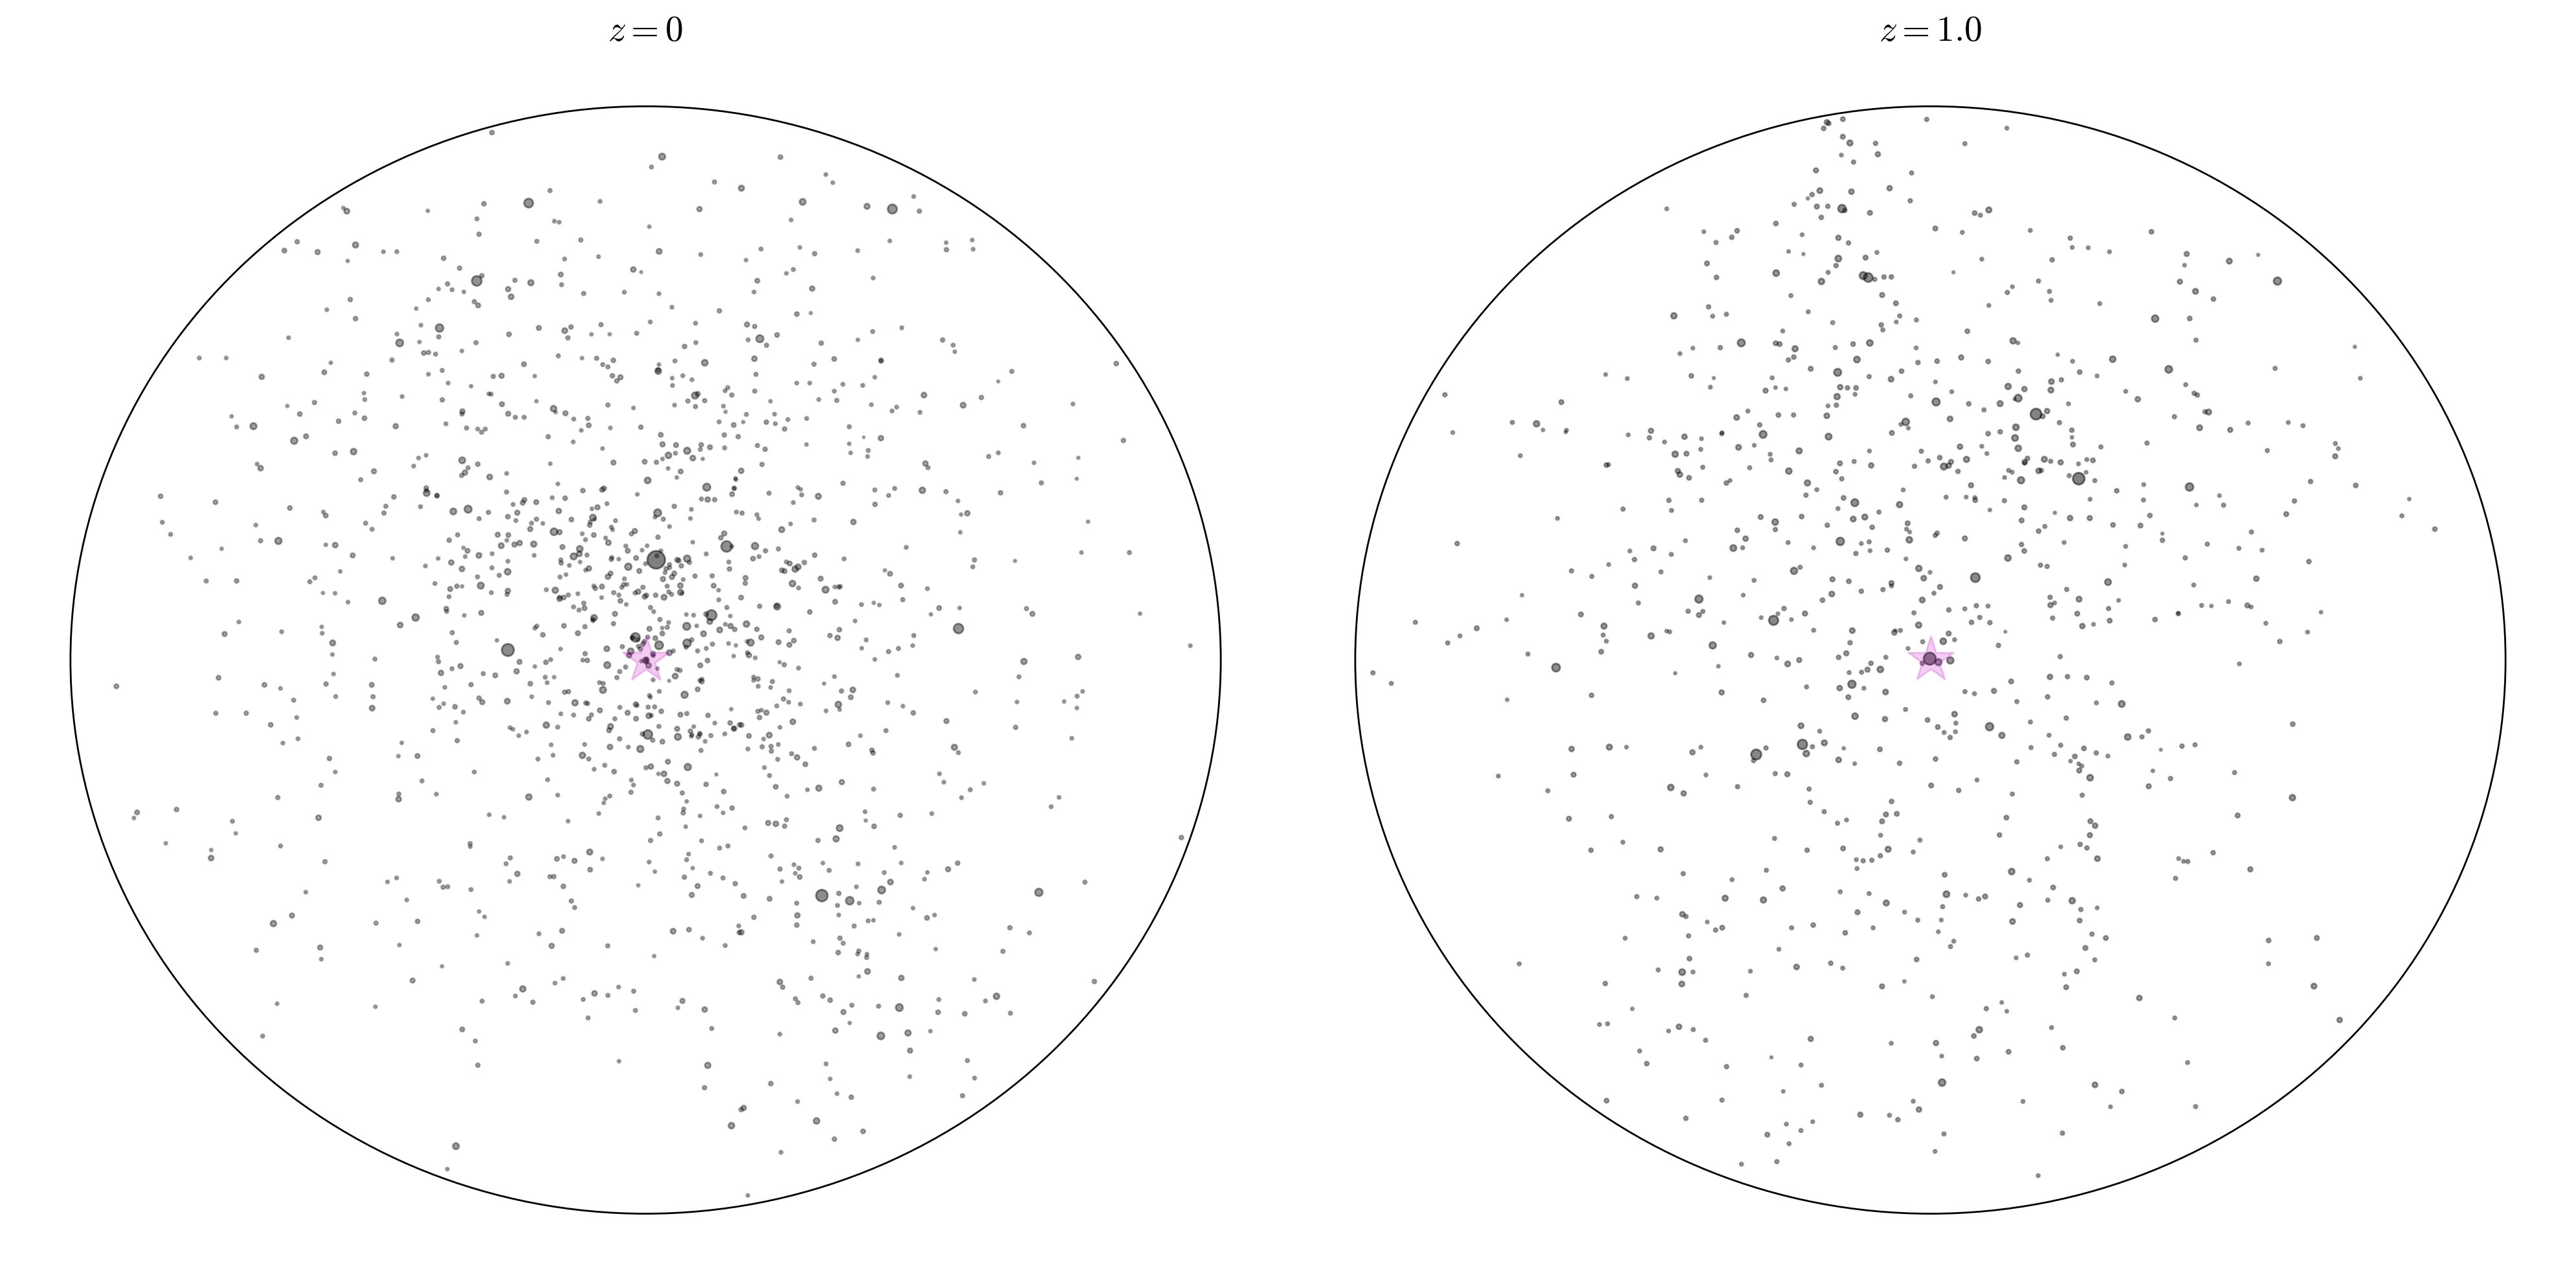

In [5]:
halos, subhalos, host_ind = cdm.get_z(0, True)
halos_1, subhalos_1, host_ind_1 = cdm.get_z(1, True)
host_main_branch = cdm.hmb

plt.figure(figsize=(20,10))

#...... z = 0
plt.subplot(121) 

plt.scatter(host_main_branch['x'][host_ind],host_main_branch['y'][host_ind],s=4*host_main_branch['rvir'][host_ind],
            marker='*',zorder=999,c='m', alpha=0.2)
circle = plt.Circle((host_main_branch['x'][host_ind],host_main_branch['y'][host_ind]), host_main_branch['rvir'][host_ind]/1000.,
                   facecolor='none',edgecolor='k')
plt.gca().add_patch(circle)

plt.scatter(subhalos['x'],subhalos['y'],s=subhalos['Rvir'],
            alpha=0.5*np.log10(subhalos['Mvir'])/np.max(np.log10(subhalos['Mvir'])),
            c='k',zorder=998)

plt.axis('off')
plt.title(r'$z=0$',fontsize=20)


#...... z = 0.85
plt.subplot(122) 

plt.scatter(host_main_branch['x'][host_ind_1],host_main_branch['y'][host_ind_1],s=4*host_main_branch['rvir'][host_ind_1],marker='*',zorder=999,
           c='m', alpha=0.2)
circle = plt.Circle((host_main_branch['x'][host_ind_1],host_main_branch['y'][host_ind_1]), host_main_branch['rvir'][host_ind_1]/1000.,
                   facecolor='none',edgecolor='k')#, color='blue')
plt.gca().add_patch(circle)

plt.scatter(subhalos_1['x'],subhalos_1['y'],s=subhalos_1['Rvir'],
            alpha=0.5*np.log10(subhalos_1['Mvir'])/np.max(np.log10(subhalos_1['Mvir'])),c='k',zorder=998)

plt.axis('off')
plt.title(r'$z=1.0$',fontsize=20)
###

plt.tight_layout()
plt.show()



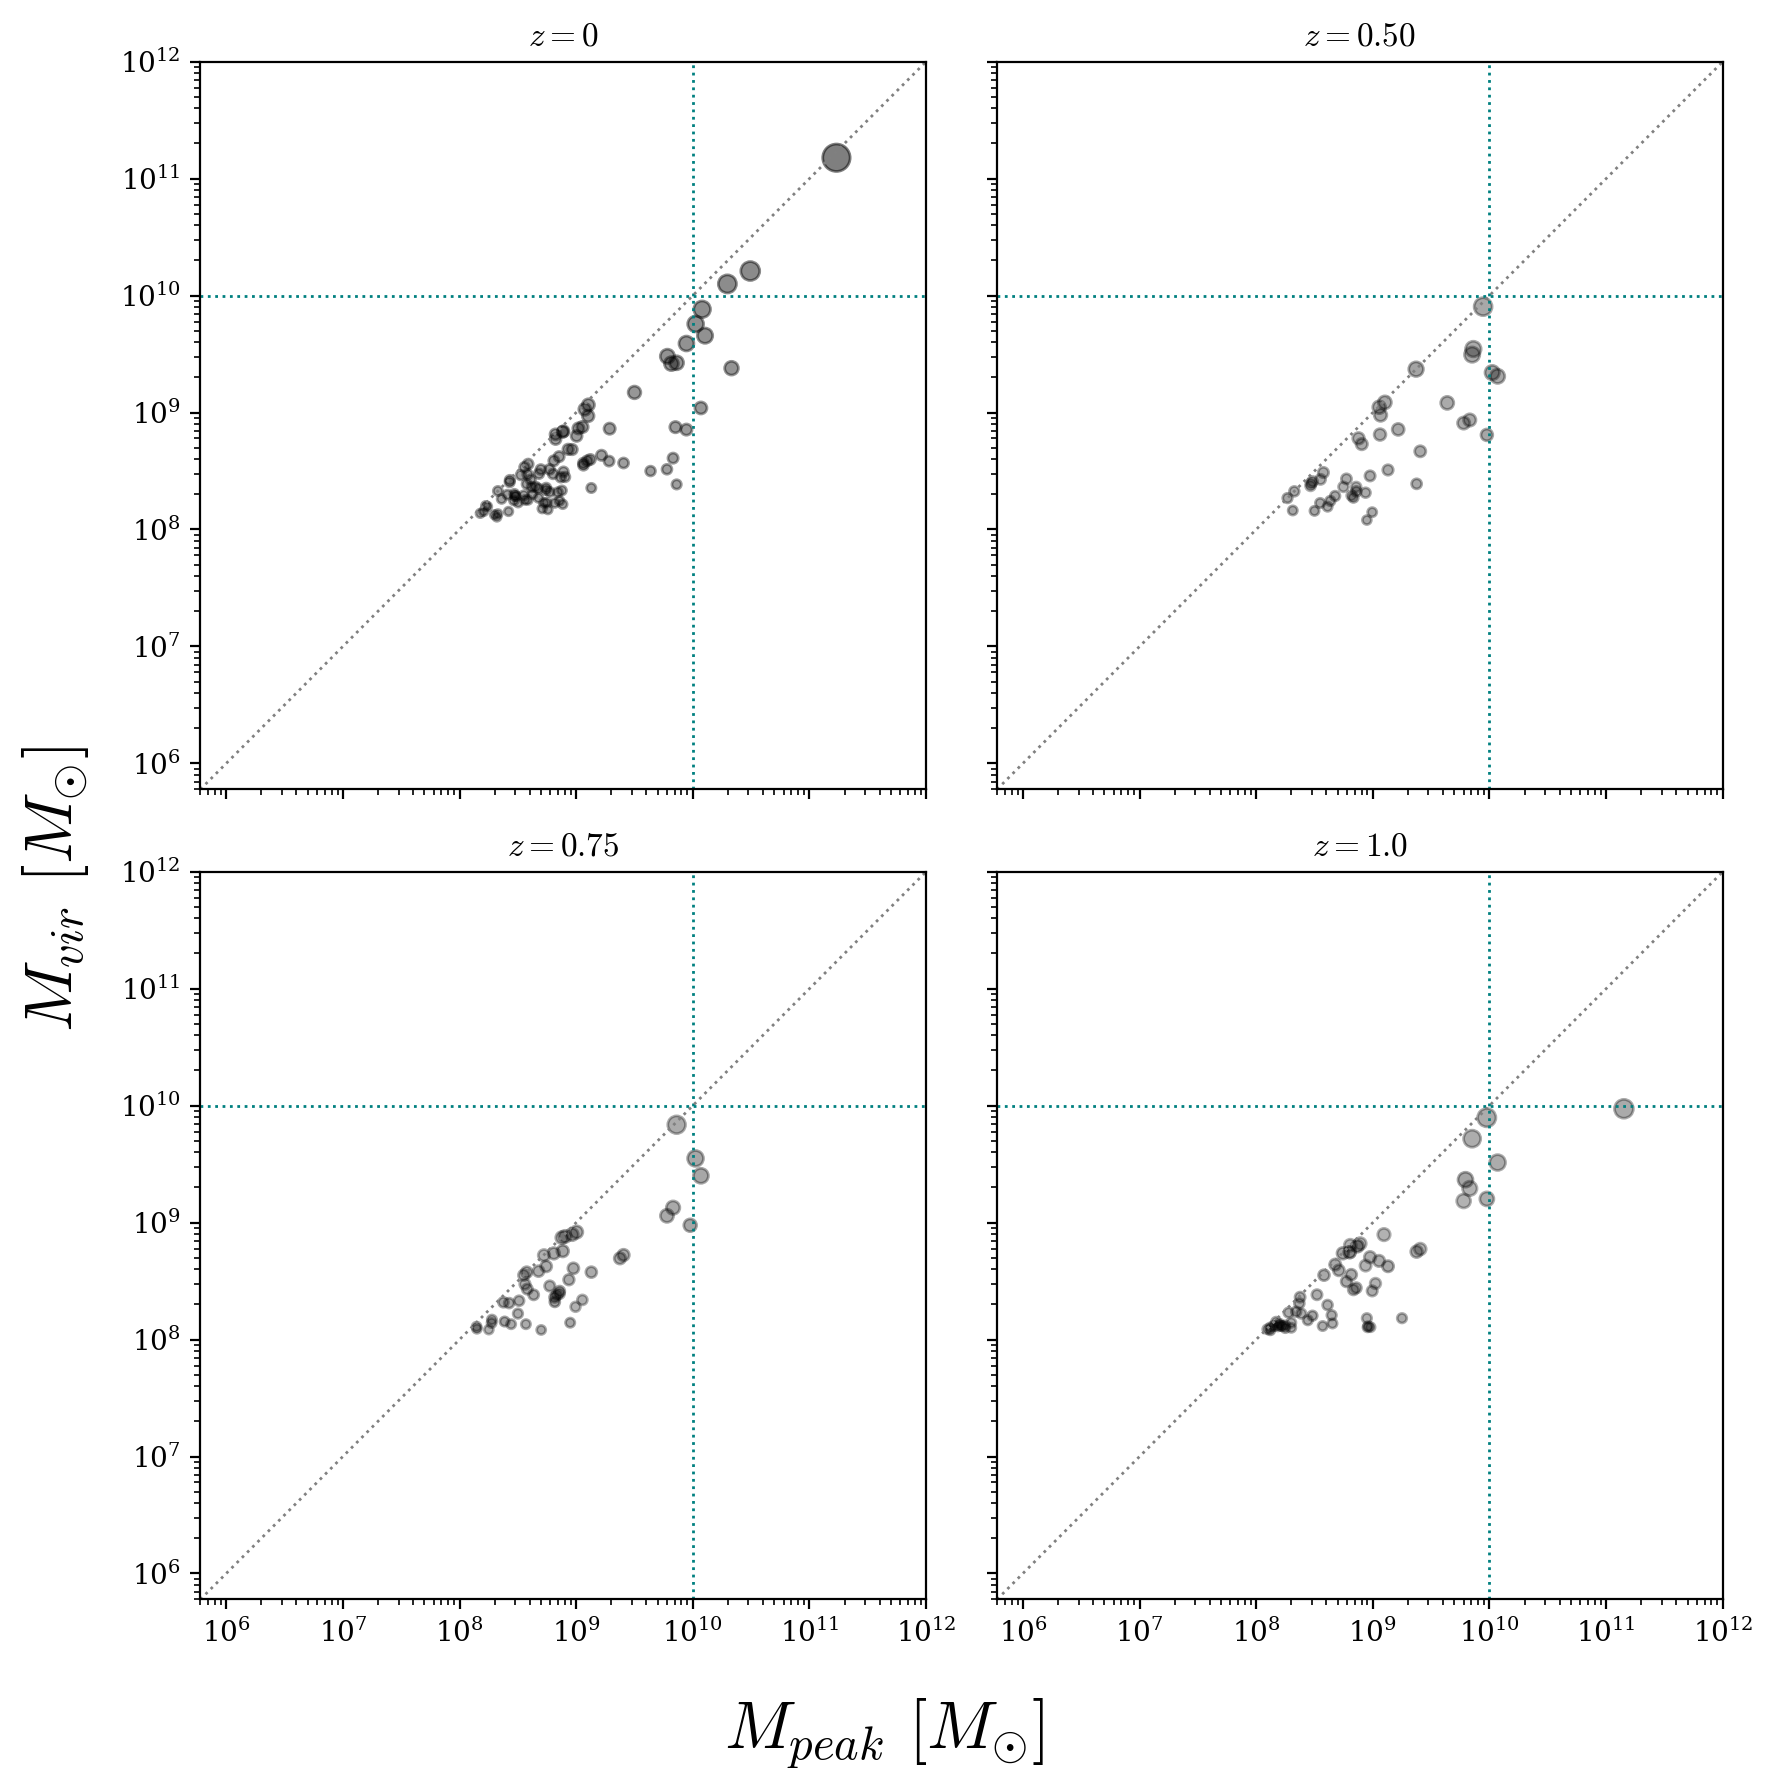

In [6]:
# TODO: add the mass cutoff to these for more reasonable numbers
halos, subhalos, host_ind = cdm.get_z(0, True)
halos_1, subhalos_1, host_ind_1 = cdm.get_z(1, True)
halos_75, subhalos_75, host_ind_75 = cdm.get_z(0.75, True)
halos_50, subhalos_50, host_ind_50 = cdm.get_z(0.50, True)

mass_cut = subhalos['Mvir']/0.7 > 1.2e8
mass_cut_1 = subhalos_1['Mvir']/0.7 > 1.2e8
mass_cut_75 = subhalos_75['Mvir']/0.7 > 1.2e8
mass_cut_50 = subhalos_50['Mvir']/0.7 > 1.2e8

fig, ax = plt.subplots(2, 2, figsize=(9, 9))

ax[0][0].scatter(subhalos['Mpeak'][mass_cut]/0.7, subhalos['Mvir'][mass_cut]/0.7, s=subhalos['Rvir'][mass_cut],
            alpha=0.5*np.log10(subhalos['Mvir'])/np.max(np.log10(subhalos['Mvir'])),c='k')
ax[0][0].set_xscale('log')
ax[0][0].set_yscale('log')
ax[0][0].set_xlim(6e5,1e12)
ax[0][0].set_ylim(6e5, 1e12)
ax[0][0].set_title(r'$z = 0$')
ax[0][0].set_xticklabels([])
ax[0][0].axhline(y=1e10, color='teal', linestyle=':', lw=1)
ax[0][0].axvline(x=1e10, color='teal', linestyle=':', lw=1)
ax[0][0].plot(np.linspace(6e5, 1e12, 100), np.linspace(6e5, 1e12, 100), color='gray', linestyle=':', lw=1)


ax[1][0].scatter(subhalos_75['Mpeak'][mass_cut_75]/0.7, subhalos_75['Mvir'][mass_cut_75]/0.7, s=subhalos_75['Rvir'][mass_cut_75],
            alpha=0.5*np.log10(subhalos_75['Mvir'])/np.max(np.log10(subhalos_75['Mvir'])),c='k')
ax[1][0].set_xscale('log')
ax[1][0].set_yscale('log')
ax[1][0].set_xlim(6e5,1e12)
ax[1][0].set_ylim(6e5, 1e12)
ax[1][0].set_title(r'$z = 0.75$')
ax[1][0].axhline(y=1e10, color='teal', linestyle=':', lw=1)
ax[1][0].axvline(x=1e10, color='teal', linestyle=':', lw=1)
ax[1][0].plot(np.linspace(6e5, 1e12, 100), np.linspace(6e5, 1e12, 100), color='gray', linestyle=':', lw=1)

ax[0][1].scatter(subhalos_50['Mpeak'][mass_cut_50]/0.7, subhalos_50['Mvir'][mass_cut_50]/0.7, s=subhalos_50['Rvir'][mass_cut_50],
            alpha=0.5*np.log10(subhalos_50['Mvir'])/np.max(np.log10(subhalos_50['Mvir'])),c='k')
ax[0][1].set_xscale('log')
ax[0][1].set_yscale('log')
ax[0][1].set_xlim(6e5,1e12)
ax[0][1].set_ylim(6e5, 1e12)
ax[0][1].set_title(r'$z = 0.50$')
ax[0][1].set_xticklabels([])
ax[0][1].set_yticklabels([])
ax[0][1].axhline(y=1e10, color='teal', linestyle=':', lw=1)
ax[0][1].axvline(x=1e10, color='teal', linestyle=':', lw=1)
ax[0][1].plot(np.linspace(6e5, 1e12, 100), np.linspace(6e5, 1e12, 100), color='gray', linestyle=':', lw=1)

ax[1][1].scatter(subhalos_1['Mpeak'][mass_cut_1]/0.7, subhalos_1['Mvir'][mass_cut_1]/0.7, s=subhalos_1['Rvir'][mass_cut_1],
            alpha=0.5*np.log10(subhalos_1['Mvir'])/np.max(np.log10(subhalos_1['Mvir'])),c='k')
ax[1][1].set_xscale('log')
ax[1][1].set_yscale('log')
ax[1][1].set_xlim(6e5,1e12)
ax[1][1].set_ylim(6e5, 1e12)
ax[1][1].set_title(r'$z = 1.0$')
ax[1][1].set_yticklabels([])
ax[1][1].axhline(y=1e10, color='teal', linestyle=':', lw=1)
ax[1][1].axvline(x=1e10, color='teal', linestyle=':', lw=1)
ax[1][1].plot(np.linspace(6e5, 1e12, 100), np.linspace(6e5, 1e12, 100), color='gray', linestyle=':', lw=1)

fig.supylabel(r'$M_{vir}$ $[M_{\odot}]$', fontsize=24)
fig.supxlabel(r'$M_{peak}$ $[M_{\odot}]$', fontsize=24)

plt.tight_layout()
plt.show()

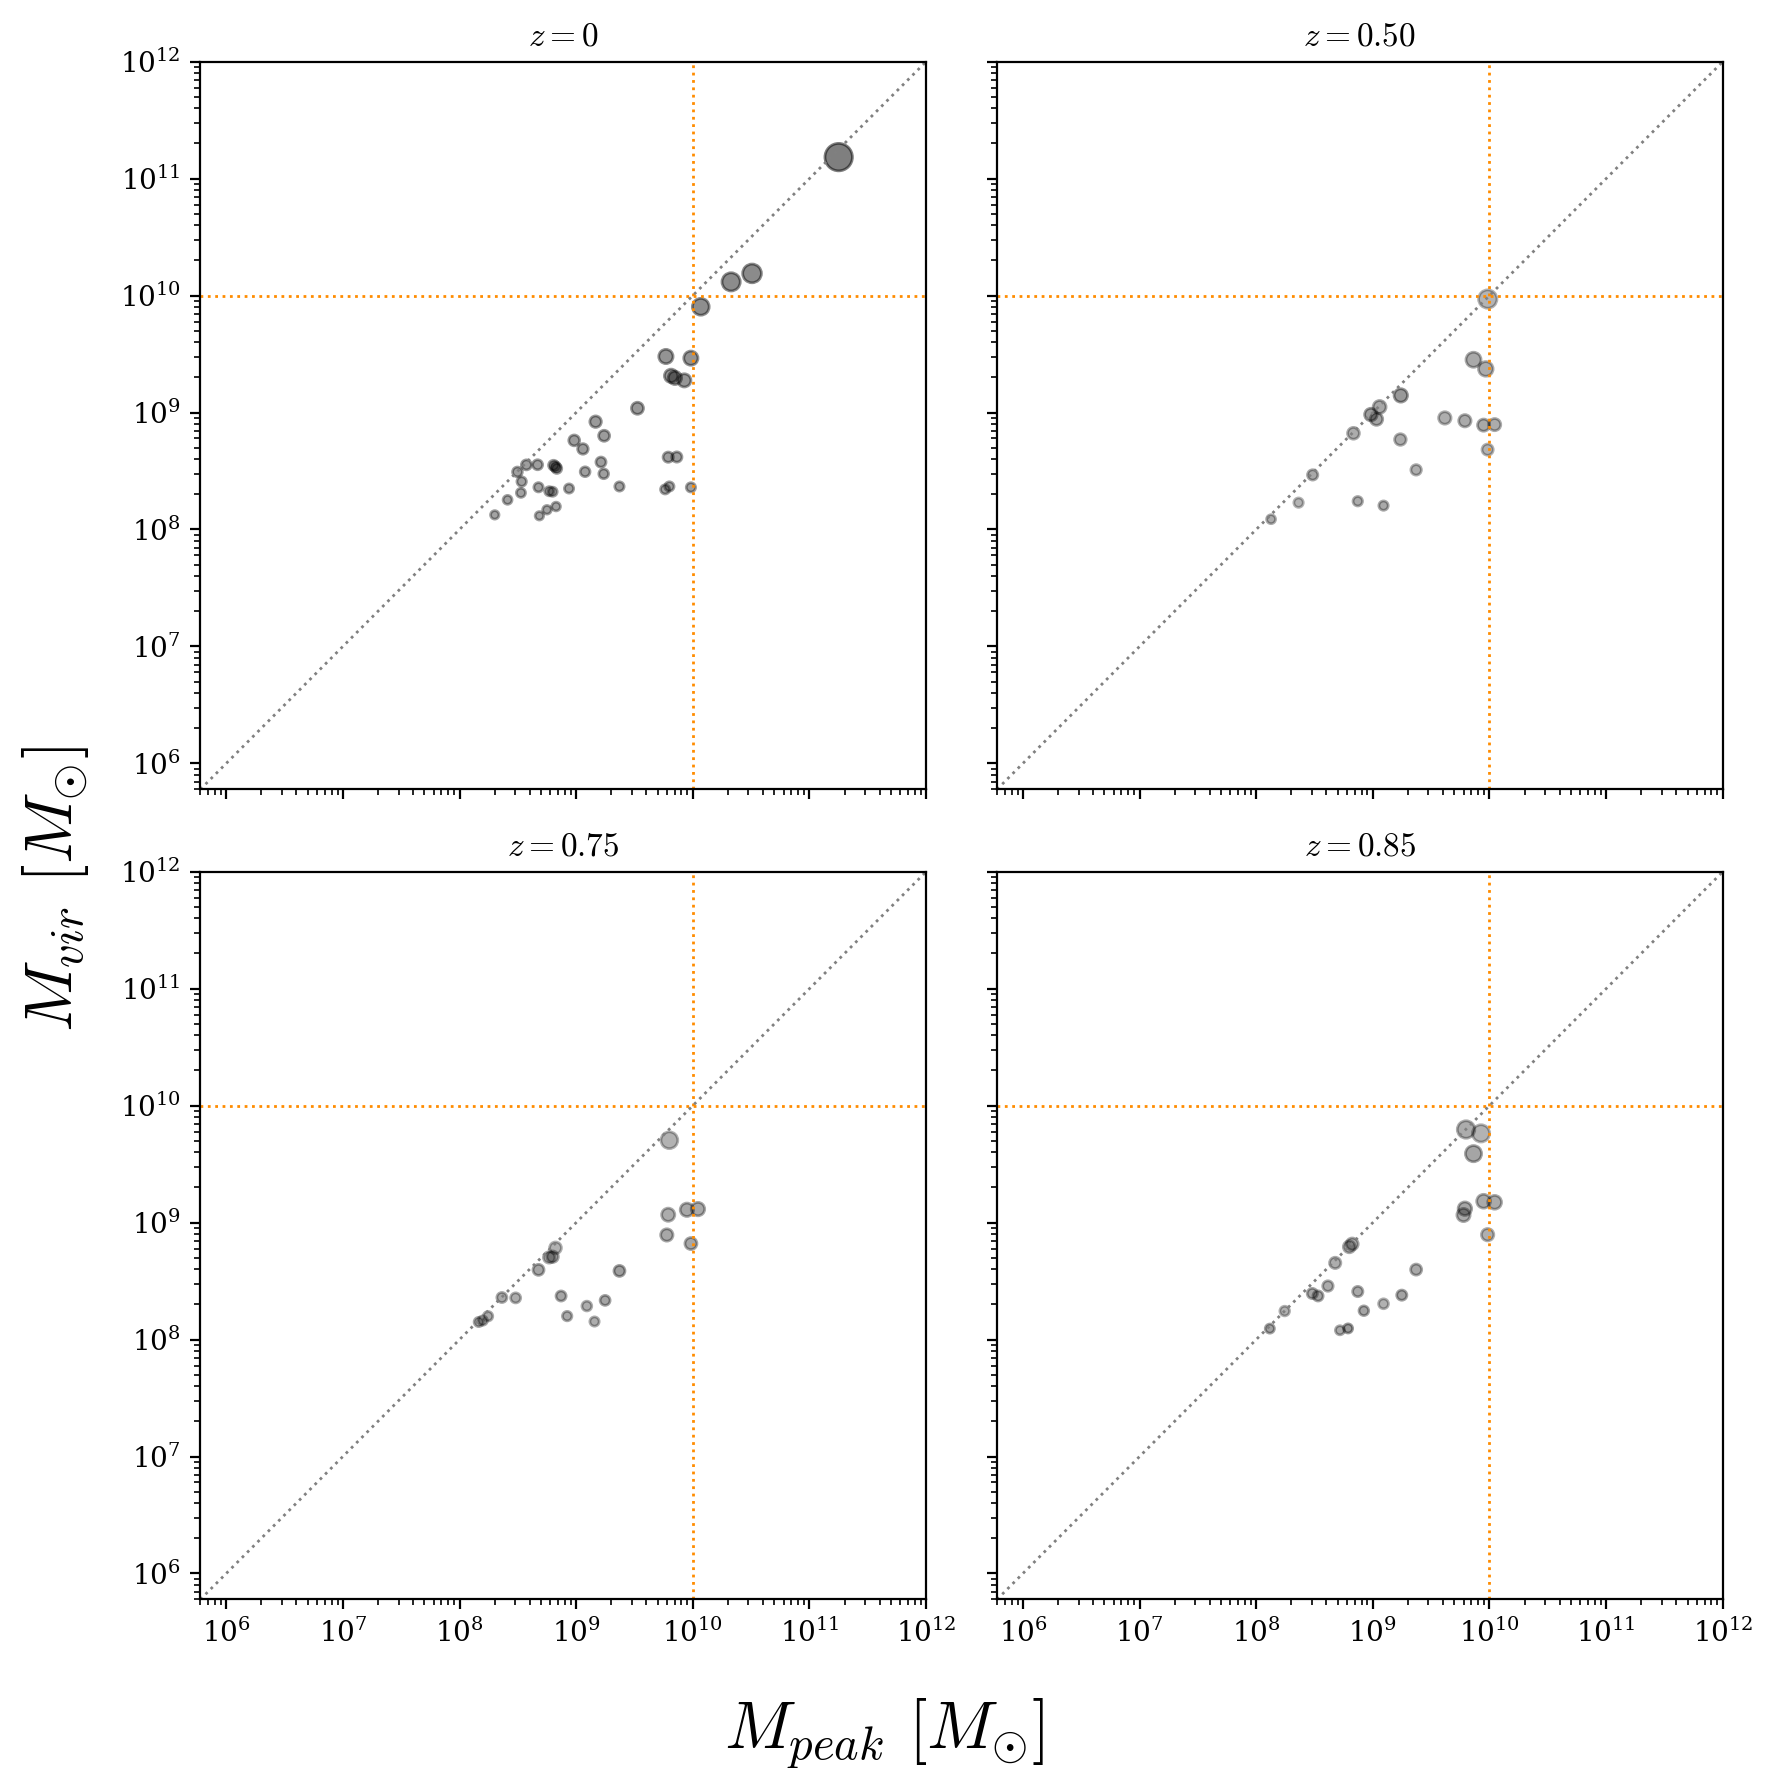

In [7]:
halos_wdm, subhalos_wdm, host_ind_wdm = wdm.get_z(0, True)
halos_wdm_85, subhalos_wdm_85, host_ind_wdm_85 = wdm.get_z(0.85, True)
halos_wdm_75, subhalos_wdm_75, host_ind_wdm_75 = wdm.get_z(0.75, True)
halos_wdm_50, subhalos_wdm_50, host_ind_wdm_50 = wdm.get_z(0.50, True)

mass_cut_wdm = subhalos_wdm['Mvir']/0.7 > 1.2e8
mass_cut_wdm_85 = subhalos_wdm_85['Mvir']/0.7 > 1.2e8
mass_cut_wdm_75 = subhalos_wdm_75['Mvir']/0.7 > 1.2e8
mass_cut_wdm_50 = subhalos_wdm_50['Mvir']/0.7 > 1.2e8

fig, ax = plt.subplots(2, 2, figsize=(9, 9))

ax[0][0].scatter(subhalos_wdm['Mpeak'][mass_cut_wdm]/0.7, subhalos_wdm['Mvir'][mass_cut_wdm]/0.7, s=subhalos_wdm['Rvir'][mass_cut_wdm],
            alpha=0.5*np.log10(subhalos_wdm['Mvir'])/np.max(np.log10(subhalos_wdm['Mvir'])),c='k')
ax[0][0].set_xscale('log')
ax[0][0].set_yscale('log')
ax[0][0].set_xlim(6e5,1e12)
ax[0][0].set_ylim(6e5, 1e12)
ax[0][0].set_title(r'$z = 0$')
ax[0][0].set_xticklabels([])
ax[0][0].axhline(y=1e10, color='darkorange', linestyle=':', lw=1)
ax[0][0].axvline(x=1e10, color='darkorange', linestyle=':', lw=1)
ax[0][0].plot(np.linspace(6e5, 1e12, 100), np.linspace(6e5, 1e12, 100), color='gray', linestyle=':', lw=1)


ax[1][0].scatter(subhalos_wdm_75['Mpeak'][mass_cut_wdm_75]/0.7, subhalos_wdm_75['Mvir'][mass_cut_wdm_75]/0.7, s=subhalos_wdm_75['Rvir'][mass_cut_wdm_75],
            alpha=0.5*np.log10(subhalos_wdm_75['Mvir'])/np.max(np.log10(subhalos_wdm_75['Mvir'])),c='k')
ax[1][0].set_xscale('log')
ax[1][0].set_yscale('log')
ax[1][0].set_xlim(6e5,1e12)
ax[1][0].set_ylim(6e5, 1e12)
ax[1][0].set_title(r'$z = 0.75$')
ax[1][0].axhline(y=1e10, color='darkorange', linestyle=':', lw=1)
ax[1][0].axvline(x=1e10, color='darkorange', linestyle=':', lw=1)
ax[1][0].plot(np.linspace(6e5, 1e12, 100), np.linspace(6e5, 1e12, 100), color='gray', linestyle=':', lw=1)

ax[0][1].scatter(subhalos_wdm_50['Mpeak'][mass_cut_wdm_50]/0.7, subhalos_wdm_50['Mvir'][mass_cut_wdm_50]/0.7, s=subhalos_wdm_50['Rvir'][mass_cut_wdm_50],
            alpha=0.5*np.log10(subhalos_wdm_50['Mvir'])/np.max(np.log10(subhalos_wdm_50['Mvir'])),c='k')
ax[0][1].set_xscale('log')
ax[0][1].set_yscale('log')
ax[0][1].set_xlim(6e5,1e12)
ax[0][1].set_ylim(6e5, 1e12)
ax[0][1].set_title(r'$z = 0.50$')
ax[0][1].set_xticklabels([])
ax[0][1].set_yticklabels([])
ax[0][1].axhline(y=1e10, color='darkorange', linestyle=':', lw=1)
ax[0][1].axvline(x=1e10, color='darkorange', linestyle=':', lw=1)
ax[0][1].plot(np.linspace(6e5, 1e12, 100), np.linspace(6e5, 1e12, 100), color='gray', linestyle=':', lw=1)

ax[1][1].scatter(subhalos_wdm_85['Mpeak'][mass_cut_wdm_85]/0.7, subhalos_wdm_85['Mvir'][mass_cut_wdm_85]/0.7, s=subhalos_wdm_85['Rvir'][mass_cut_wdm_85],
            alpha=0.5*np.log10(subhalos_wdm_85['Mvir'])/np.max(np.log10(subhalos_wdm_85['Mvir'])),c='k')
ax[1][1].set_xscale('log')
ax[1][1].set_yscale('log')
ax[1][1].set_xlim(6e5,1e12) 
ax[1][1].set_ylim(6e5, 1e12)
ax[1][1].set_title(r'$z = 0.85$')
ax[1][1].set_yticklabels([])
ax[1][1].axhline(y=1e10, color='darkorange', linestyle=':', lw=1)
ax[1][1].axvline(x=1e10, color='darkorange', linestyle=':', lw=1)
ax[1][1].plot(np.linspace(6e5, 1e12, 100), np.linspace(6e5, 1e12, 100), color='gray', linestyle=':', lw=1)

fig.supylabel(r'$M_{vir}$ $[M_{\odot}]$', fontsize=24)
fig.supxlabel(r'$M_{peak}$ $[M_{\odot}]$', fontsize=24)

plt.tight_layout()
plt.show()

### halo ratio (?) function
looking at $N/N_{CDM}$ for both $z = 0$ and $z= rel.$, with mass remaining fixed and z as the independent variable. might be an interesting probe to see how scale suppression comes into play for different models.

In [32]:
# TODO: come back to fix this (overflow error?)

def get_ratio(model: hlist = cdm, m: float = 0): # default range may need adjusting
    a_range = [ a for a in list(model.dict.keys()) if (1.0/a) - 1.0 < 4.5]
    print(a_range)

    m = np.log10(m) # converting to log10
    ratios = np.zeros((len(a_range), ))

    halos_cdm, subhalos_cdm = model.get_z(0)
    values_cdm, cumulative_cdm, base_cdm, mass_cut_cdm = cdm.shmf(0, return_masscut_idx=True)

    for i, a in enumerate(a_range):
        halos, subhalos = model.get_a(a)
        values, cumulative, base, mass_cut = model.shmf( (1.0/a) - 1.0, return_masscut_idx=True)
        temp = (1.*len(subhalos['Mpeak'][mass_cut])-cumulative)/(1.*len(subhalos_cdm['Mpeak'][mass_cut_cdm])-cumulative_cdm)

        mass_ind = np.argmin(np.abs(base - m))
        # print(mass_ind)
        ratios[i] = temp[mass_ind]

    return ratios
        
r = get_ratio(cdm, 1e9)
r

[0.18351, 0.18587, 0.18825, 0.19067, 0.19312, 0.19559, 0.1981, 0.20064, 0.20322, 0.20583, 0.20847, 0.21114, 0.21385, 0.21659, 0.21937, 0.22219, 0.22504, 0.22792, 0.23085, 0.23381, 0.23681, 0.23985, 0.24292, 0.24604, 0.2492, 0.2524, 0.25563, 0.25891, 0.26223, 0.2656, 0.26901, 0.27246, 0.27595, 0.27949, 0.28308, 0.28671, 0.29039, 0.29411, 0.29789, 0.30171, 0.30558, 0.3095, 0.31347, 0.31749, 0.32157, 0.32569, 0.32987, 0.3341, 0.33839, 0.34273, 0.34713, 0.35158, 0.35609, 0.36066, 0.36529, 0.36997, 0.37472, 0.37953, 0.3844, 0.38933, 0.39432, 0.39938, 0.4045, 0.40969, 0.41495, 0.42027, 0.42566, 0.43113, 0.43666, 0.44226, 0.44793, 0.45368, 0.4595, 0.4654, 0.47137, 0.47741, 0.48354, 0.48974, 0.49602, 0.50239, 0.50883, 0.51536, 0.52197, 0.52867, 0.53545, 0.54232, 0.54928, 0.55633, 0.56346, 0.57069, 0.57802, 0.58543, 0.59294, 0.60055, 0.60825, 0.61606, 0.62396, 0.63197, 0.64007, 0.64828, 0.6566, 0.66503, 0.67356, 0.6822, 0.69095, 0.69982, 0.70879, 0.71789, 0.7271, 0.73643, 0.74587, 0.75544, 0.76

/Users/logan_main/opt/anaconda3/envs/hmf/lib/python3.11/site-packages/helpers/SimulationAnalysis.py:89: RuntimeWarning: overflow encountered in cast
  return tuple(c(items[i]) for i, c in zip(self._usecols, self._formats))


KeyboardInterrupt: 

### (a brief foray into animation)
also something to come back to and troubleshoot, but not urgent. would be cool to have for visualizing how the subhalo pop. changes over time!
(keep in mind for final presentation?)

In [ ]:
# TODO: other fun visualizations? mess around.
from matplotlib.animation import FuncAnimation 
fig = plt.figure(figsize=(10,10))

def animate(z):
    fig = plt.figure(figsize=(10,10))
    halos, subhalos, host_ind = cdm.get_z(z, True)

    plt.scatter(cdm.hmb['x'][host_ind],cdm.hmb['y'][host_ind],s=4*cdm.hmb['rvir'][host_ind],marker='*',zorder=999,
            c='k')
    circle = plt.Circle((cdm.hmb['x'][host_ind],cdm.hmb['y'][host_ind]), cdm.hmb['rvir'][host_ind]/1000.,
                    facecolor='none',edgecolor='k')#, color='blue')
    plt.gca().add_patch(circle)

    plt.scatter(subhalos['x'],subhalos['y'],s=subhalos['Rvir'],
                alpha=0.5*np.log10(subhalos['Mvir'])/np.max(np.log10(subhalos['Mvir'])),c='k',zorder=998)

    plt.axis('off')
    plt.title(f'z = {z}')
    plt.show()


<Figure size 1000x1000 with 0 Axes>